In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Reading data

In [2]:
# Accident file
crash_2016 = pd.read_csv('data/crash/2016/ACCIDENT.csv')
crash_2016.columns = crash_2016.columns.str.lower()

# Vehicle file
crash_vehicle_2016 = pd.read_csv('data/crash/2016/VEHICLE.csv')
crash_vehicle_2016.columns = crash_vehicle_2016.columns.str.lower()

# Vindecode file
vindecode_2016 = pd.read_csv('data/crash/2016/VINDECODE.csv')
vindecode_2016.columns = vindecode_2016.columns.str.lower()

# Factor file
crash_factor_2016 = pd.read_csv('data/crash/2016/FACTOR.csv')
crash_factor_2016.columns = crash_factor_2016.columns.str.lower()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,24,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', 200) # to display all 51 columns 
crash_2016.head()

,casenum,psu,pj,stratum,ve_total,ve_forms,pvh_invl,peds,permvit,pernotmvit,num_inj,month,year,day_week,hour,minute,harm_ev,alcohol,max_sev,man_coll,reljct1,reljct2,typ_int,wrk_zone,rel_road,lgt_cond,weather1,weather2,weather,sch_bus,int_hwy,cf1,cf2,cf3,wkdy_im,hour_im,minute_im,event1_im,mancol_im,reljct1_im,reljct2_im,lgtcon_im,weathr_im,maxsev_im,no_inj_im,alchl_im,urbanicity,region,psustrat,psu_var,weight
0,201600014311,44,388,9,2,2,0,0,2,0,0,1,2016,2,12,33,12,2,0,7,0,1,1,0,1,1,1,0,1,0,0,0,0,0,2,12,33,12,7,0,1,1,1,0,0,2,2,4,25,44,219.795475
1,201600014315,44,388,8,2,2,0,0,4,0,4,1,2016,2,19,32,12,2,1,2,0,2,98,0,1,3,1,0,1,0,0,0,0,0,2,19,32,12,2,0,2,3,1,1,4,2,2,4,25,44,186.634758
2,201600014316,44,388,5,1,1,0,0,1,0,1,1,2016,3,6,20,43,2,3,0,0,1,1,0,4,3,1,0,1,0,0,0,0,0,3,6,20,43,0,0,1,3,1,3,1,2,2,4,25,44,32.222550
3,201600014335,44,388,10,2,2,0,0,2,0,0,1,2016,6,20,38,12,9,0,2,0,2,98,0,1,3,3,0,3,0,0,0,0,0,6,20,38,12,2,0,2,3,3,0,0,2,2,4,25,44,317.681532
4,201600014586,24,170,2,1,1,0,1,1,1,1,1,2016,2,8,10,8,2,2,0,0,8,1,0,1,1,1,0,1,0,0,0,0,0,2,8,10,8,0,0,8,1,1,2,1,2,2,4,24,24,37.251626


In [4]:
vindecode_2016.head()

,casenum,veh_no,vin,ncicmake,vinyear,vehtype,vehtype_t,vinmake_t,vinmodel_t,vintrim_t,vintrim1_t,vintrim2_t,vintrim3_t,vintrim4_t,bodystyl,bodystyl_t,doors,wheels,drivwhls,mfg,mfg_t,displci,displcc,cylndrs,cycles,fuel,fuel_t,fuelinj,fuelinj_t,carbtype,carbtype_t,carbbrls,gvwrange,gvwrange_t,whlbsh,whlblg,tiredesc_f,psi_f,tiresz_f,tiresz_f_t,tiredesc_r,psi_r,rearsize,rearsize_t,tonrating,shipweight,msrp,drivetyp,drivetyp_t,salectry,salectry_t,abs,abs_t,security,security_t,drl,drl_t,rstrnt,rstrnt_t,tkcab,tkcab_t,tkaxlef,tkaxlef_t,tkaxler,tkaxler_t,tkbrak,tkbrak_t,engmfg,engmfg_t,engmodel,tkduty,tkduty_t,tkbedl,tkbedl_t,segmnt,segmnt_t,plant,plntctry_t,plntcity,plntctry,plntstat,plntstat_t,origin,origin_t,dispclmt,blocktype,enghead,enghead_t,vlvclndr,vlvtotal,engvincd,incomplt,battyp,battyp_t,batkwrtg,batvolt,supchrgr,supchrgr_t,turbo,turbo_t,engvvt,mcyusage,mcyusage_t,flag
0,201600014311,1,1HGCG16532A0,HOND,2002.0,P,PASSENGER CAR,HONDA,ACCORD,EX,NaN,NaN,NaN,NaN,SD,SEDAN,4.0,0.0,0.0,C141,HONDA,183.0,0.0,6,NaN,G,GAS,U,UNKNOWN,F,FUEL INJECTION,NaN,NaN,NaN,106.9,106.9,NaN,0.0,30,15R205,NaN,0.0,NaN,NaN,NaN,3329.0,25300.0,FWD,FRONT WHEEL DRIVE,NaN,NaN,2,ALL WHEEL STD,P,PASS KEY,N,NOT AVAILABLE,R,DU AR BGS FRNT/SD/ACTV BLTS W/ATO PASS SNSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,NON LUXURY TRADITIONAL MID SIZE,A,UNITED STATES,MARYSVILLE,USA,OH,OHIO,B,IMPORT BUILT IN NORTH AMERICA,3.0,V-TYPE,SOHC,SINGLE OVERHEAD CAMSHAFT,0.0,24.0,CG1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VINS BASED ON CRSS
1,201600014311,2,4T3ZA3BB5DU0,TOYT,2013.0,T,TRUCK,TOYOTA,VENZA,LE,XLE,NaN,NaN,NaN,UT,SPORT UTILITY VEHICLE,4.0,4.0,2.0,C175,TOYOTA,164.0,0.0,4,NaN,G,GAS,NaN,NaN,F,FUEL INJECTION,NaN,1.0,"0 - 6,000#",109.3,109.3,NaN,0.0,62,19R245,NaN,0.0,62.0,19R245,NaN,3760.0,27700.0,FWD,FRONT WHEEL DRIVE,NaN,NaN,2,ALL WHEEL STD,F,IMMOBILIZER AND KEYLESS ENTRY,S,STANDARD,7,DU FRNT/SD/HD AIR BGS/RR HD AR BGS/ACT BELTS,SUV,SPORT UTILITY,U,UNKNOWN,U,UNKNOWN,HYD,HYDRAULIC,207,TOYOTA,NaN,NaN,NaN,NaN,NaN,V,NON LUXURY MID SIZE CUV,U,UNITED STATES,GEORGETOWN,USA,KY,KENTUCKY,B,IMPORT BUILT IN NORTH AMERICA,2.7,IN-LINE,DOHC,DOUBLE OVERHEAD CAMSHAFT,4.0,16.0,A,N,NaN,NaN,NaN,NaN,N,NO,N,NO,Y,NaN,NaN,VINS BASED ON CRSS
2,201600014315,1,1GTEC14Z8SZ5,GMC,1995.0,T,TRUCK,GMC,SIERRA,C1500,NaN,NaN,NaN,NaN,PK,PICKUP,2.0,4.0,2.0,C137,GENERAL MOTORS,262.0,0.0,6,NaN,G,GAS,U,UNKNOWN,F,FUEL INJECTION,NaN,2.0,"6,001 - 10,000#",117.5,131.5,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,B,4068.0,13457.0,RWD,REAR WHEEL DRIVE,NaN,NaN,2,ALL WHEEL STD,U,UNKNOWN,N,NOT AVAILABLE,M,DRIVER FRONT AIR BAG/PASSENGER ACTIVE BELTS,CON,CONVENTIONAL,N,STANDARD AXLE,S,SINGLE,HYD,HYDRAULIC,080,GENERAL MOTORS,4.3L,ME,MEDIUM DUTY,R,REGULAR,4,NON LUXURY FULL SIZE HALF TON PICKUP,Z,UNITED STATES,FORT WAYNE,USA,IN,INDIANA,D,DOMESTIC,4.3,V-TYPE,NaN,NaN,0.0,0.0,Z,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VINS BASED ON CRSS
3,201600014315,2,1FMZU67KX4UB,FORD,2004.0,T,TRUCK,FORD,EXPLORER SPORT TRAC,NaN,NaN,NaN,NaN,NaN,TU,SPORT UTILITY TRUCK,4.0,4.0,2.0,C134,FORD,245.0,0.0,6,NaN,F,FLEXIBLE,U,UNKNOWN,F,FUEL INJECTION,NaN,1.0,"0 - 6,000#",125.9,125.9,NaN,0.0,40,16R235,NaN,0.0,NaN,NaN,B,4135.0,23470.0,RWD,REAR WHEEL DRIVE,NaN,NaN,2,ALL WHEEL STD,P,PASS KEY,N,NOT AVAILABLE,K,DUAL AIR BAGS FRONT AND SIDES/ACTIVE BELTS,SUV,SPORT UTILITY,U,UNKNOWN,U,UNKNOWN,U,UNKNOWN,NaN,NaN,NaN,U,UNKNOWN,NaN,NaN,T,NON LUXURY MID SIZE PICKUP,U,UNITED STATES,LOUISVILLE,USA,KY,KENTUCKY,D,DOMESTIC,4.0,V-TYPE,SOHC,SINGLE OVERHEAD CAMSHAFT,0.0,0.0,K,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VINS BASED ON CRSS
4,201600014316,1,1G8ZK52702Z1,STRN,2002.0,P,PASSENGER CAR,SATURN,SL2,NaN,NaN,NaN,NaN,NaN,SD,SEDAN,4.0,0.0,0.0,C137,GENERAL MOTORS,116.0,0.0,4,NaN,G,GAS,U,UNKNOWN,F,FUEL INJECTION,NaN,NaN,NaN,102.4,102.4,NaN,0.0,27,15R185,NaN,0.0,NaN,NaN,NaN,2431.0,14195.0,FWD,FRONT WHEEL DRIVE,NaN,NaN,5,ALL WHEEL OPT,T,OTHER,S,STANDARD,E,DUAL FRONT AIR BAG/ACTIVE BELTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NON LUXURY

#### Quick look at the years of vehicles

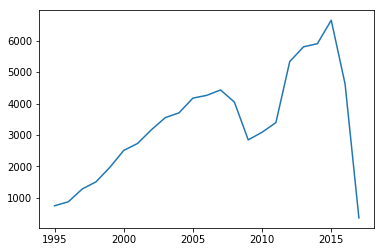

In [5]:
plt.plot(crash_vehicle_2016.mod_year.value_counts()[crash_vehicle_2016.mod_year.value_counts().index.isin(range(1995,2020))].sort_index().index, 
         crash_vehicle_2016.mod_year.value_counts()[crash_vehicle_2016.mod_year.value_counts().index.isin(range(1995,2020))].sort_index())

#### Finding 1:

The number of 2008-2011 year vehicles are lower than expected. It must be related with financial crisis of 2007-2008 and its long-term effects

### Initial filtering

#### Filter 1

I just want to look automobiles(small sport to family van) and small pickups. So here, busses and bigger vehicles are excluded.

In [6]:
filtered_crash_vehicle_2016 = crash_vehicle_2016[(crash_vehicle_2016.body_typ<50) & ~(crash_vehicle_2016.body_typ.isin([21, 22, 28, 29]))]

#### Filter 2

Also, since vehicle make and model names come from vin decoding, if the vin is not valid these vehicles are excluded.

In [7]:
filtered_crash_vehicle_2016 = filtered_crash_vehicle_2016[~(crash_vehicle_2016.vin.isin(['888888888888', '999999999999', '000000000000']))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


#### Filter 3

Since I will rate the maximum sverity of injury, I will filter out if the injury occured prior to crash or there is no person involved.

In [8]:
filtered_crash_vehicle_2016 = filtered_crash_vehicle_2016[filtered_crash_vehicle_2016.mxvsev_im<6]

#### Filter 4

Since I am looking what percentage of all occupants in a vehicle is injured, I will filter out if the number of occupants is unknown.

In [9]:
filtered_crash_vehicle_2016 = filtered_crash_vehicle_2016[filtered_crash_vehicle_2016.numoccs<98]

Dropping irrelevant or not useful columns

In [10]:
filtered_crash_vehicle_2016.columns

Index(['casenum', 'veh_no', 'psu', 'pj', 'stratum', 've_forms', 'numoccs',
       'month', 'hour', 'minute', 'harm_ev', 'man_coll', 'unittype', 'hit_run',
       'make', 'model', 'body_typ', 'mod_year', 'mak_mod', 'vin', 'tow_veh',
       'j_knife', 'mcarr_i1', 'mcarr_i2', 'mcarr_id', 'gvwr', 'v_config',
       'cargo_bt', 'haz_inv', 'haz_plac', 'haz_id', 'haz_cno', 'haz_rel',
       'bus_use', 'spec_use', 'emer_use', 'trav_sp', 'rollover', 'rolinloc',
       'impact1', 'deformed', 'towed', 'm_harm', 'veh_sc1', 'veh_sc2',
       'veh_alch', 'max_vsev', 'num_injv', 'fire_exp', 'dr_pres', 'dr_zip',
       'speedrel', 'dr_sf1', 'dr_sf2', 'dr_sf3', 'dr_sf4', 'vtrafway',
       'vnum_lan', 'vspd_lim', 'valign', 'vprofile', 'vsurcond', 'vtrafcon',
       'vtcont_f', 'p_crash1', 'p_crash2', 'p_crash3', 'pcrash4', 'pcrash5',
       'acc_type', 'trlr1vin', 'trlr2vin', 'trlr3vin', 'hitrun_im',
       'bdytyp_im', 'mdlyr_im', 'impact1_im', 'vevent_im', 'pcrash1_im',
       'mxvsev_im', 'numinj_im

In [11]:
filtered_crash_vehicle_2016 = filtered_crash_vehicle_2016.drop(
    columns=['psu', 'pj', 'stratum', 'unittype', 'hit_run', 'make', 'model', 
             'mod_year', 'body_typ','impact1', 'm_harm', 'veh_alch', 'max_vsev',
             'num_injv', 'mak_mod', 'tow_veh', 'j_knife', 'mcarr_i1', 'mcarr_i2', 
             'gvwr', 'v_config', 'cargo_bt', 'haz_inv', 'haz_plac', 'haz_id', 
             'haz_cno', 'haz_rel','bus_use', 'spec_use', 'emer_use', 'towed', 
             'veh_sc1', 'veh_sc2', 'mcarr_id', 'dr_pres', 'dr_sf1', 'dr_sf2', 
             'dr_sf3', 'dr_sf4','vtrafcon', 'vtcont_f', 'p_crash1', 'p_crash2', 
             'p_crash3', 'pcrash4', 'pcrash5', 'trlr1vin', 'trlr2vin', 'trlr3vin', 
             'hitrun_im', 'urbanicity', 'region', 'psustrat', 'psu_var', 'weight'])

### Merging files

Taking the vehicle make and model names from vindecode file

Firstly concatanating the make and model names

In [12]:
vindecode_2016['make_model'] = vindecode_2016.vinmake_t + ' ' + vindecode_2016.vinmodel_t

Merging and getting make_model column

In [13]:
filtered_crash_vehicle_2016 = pd.merge(filtered_crash_vehicle_2016, vindecode_2016[['casenum', 'veh_no', 'vin', 'vinmake_t', 'vinmodel_t', 'vinyear', 'vintrim_t', 'make_model']], on=['casenum', 'veh_no', 'vin'], how='inner').rename(columns={'vinmake_t':'make', 'vinmodel_t':'model', 'vintrim_t':'trim'})

In [14]:
vindecode_2016.head()

,casenum,veh_no,vin,ncicmake,vinyear,vehtype,vehtype_t,vinmake_t,vinmodel_t,vintrim_t,vintrim1_t,vintrim2_t,vintrim3_t,vintrim4_t,bodystyl,bodystyl_t,doors,wheels,drivwhls,mfg,mfg_t,displci,displcc,cylndrs,cycles,fuel,fuel_t,fuelinj,fuelinj_t,carbtype,carbtype_t,carbbrls,gvwrange,gvwrange_t,whlbsh,whlblg,tiredesc_f,psi_f,tiresz_f,tiresz_f_t,tiredesc_r,psi_r,rearsize,rearsize_t,tonrating,shipweight,msrp,drivetyp,drivetyp_t,salectry,salectry_t,abs,abs_t,security,security_t,drl,drl_t,rstrnt,rstrnt_t,tkcab,tkcab_t,tkaxlef,tkaxlef_t,tkaxler,tkaxler_t,tkbrak,tkbrak_t,engmfg,engmfg_t,engmodel,tkduty,tkduty_t,tkbedl,tkbedl_t,segmnt,segmnt_t,plant,plntctry_t,plntcity,plntctry,plntstat,plntstat_t,origin,origin_t,dispclmt,blocktype,enghead,enghead_t,vlvclndr,vlvtotal,engvincd,incomplt,battyp,battyp_t,batkwrtg,batvolt,supchrgr,supchrgr_t,turbo,turbo_t,engvvt,mcyusage,mcyusage_t,flag,make_model
0,201600014311,1,1HGCG16532A0,HOND,2002.0,P,PASSENGER CAR,HONDA,ACCORD,EX,NaN,NaN,NaN,NaN,SD,SEDAN,4.0,0.0,0.0,C141,HONDA,183.0,0.0,6,NaN,G,GAS,U,UNKNOWN,F,FUEL INJECTION,NaN,NaN,NaN,106.9,106.9,NaN,0.0,30,15R205,NaN,0.0,NaN,NaN,NaN,3329.0,25300.0,FWD,FRONT WHEEL DRIVE,NaN,NaN,2,ALL WHEEL STD,P,PASS KEY,N,NOT AVAILABLE,R,DU AR BGS FRNT/SD/ACTV BLTS W/ATO PASS SNSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,NON LUXURY TRADITIONAL MID SIZE,A,UNITED STATES,MARYSVILLE,USA,OH,OHIO,B,IMPORT BUILT IN NORTH AMERICA,3.0,V-TYPE,SOHC,SINGLE OVERHEAD CAMSHAFT,0.0,24.0,CG1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VINS BASED ON CRSS,HONDA ACCORD
1,201600014311,2,4T3ZA3BB5DU0,TOYT,2013.0,T,TRUCK,TOYOTA,VENZA,LE,XLE,NaN,NaN,NaN,UT,SPORT UTILITY VEHICLE,4.0,4.0,2.0,C175,TOYOTA,164.0,0.0,4,NaN,G,GAS,NaN,NaN,F,FUEL INJECTION,NaN,1.0,"0 - 6,000#",109.3,109.3,NaN,0.0,62,19R245,NaN,0.0,62.0,19R245,NaN,3760.0,27700.0,FWD,FRONT WHEEL DRIVE,NaN,NaN,2,ALL WHEEL STD,F,IMMOBILIZER AND KEYLESS ENTRY,S,STANDARD,7,DU FRNT/SD/HD AIR BGS/RR HD AR BGS/ACT BELTS,SUV,SPORT UTILITY,U,UNKNOWN,U,UNKNOWN,HYD,HYDRAULIC,207,TOYOTA,NaN,NaN,NaN,NaN,NaN,V,NON LUXURY MID SIZE CUV,U,UNITED STATES,GEORGETOWN,USA,KY,KENTUCKY,B,IMPORT BUILT IN NORTH AMERICA,2.7,IN-LINE,DOHC,DOUBLE OVERHEAD CAMSHAFT,4.0,16.0,A,N,NaN,NaN,NaN,NaN,N,NO,N,NO,Y,NaN,NaN,VINS BASED ON CRSS,TOYOTA VENZA
2,201600014315,1,1GTEC14Z8SZ5,GMC,1995.0,T,TRUCK,GMC,SIERRA,C1500,NaN,NaN,NaN,NaN,PK,PICKUP,2.0,4.0,2.0,C137,GENERAL MOTORS,262.0,0.0,6,NaN,G,GAS,U,UNKNOWN,F,FUEL INJECTION,NaN,2.0,"6,001 - 10,000#",117.5,131.5,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,B,4068.0,13457.0,RWD,REAR WHEEL DRIVE,NaN,NaN,2,ALL WHEEL STD,U,UNKNOWN,N,NOT AVAILABLE,M,DRIVER FRONT AIR BAG/PASSENGER ACTIVE BELTS,CON,CONVENTIONAL,N,STANDARD AXLE,S,SINGLE,HYD,HYDRAULIC,080,GENERAL MOTORS,4.3L,ME,MEDIUM DUTY,R,REGULAR,4,NON LUXURY FULL SIZE HALF TON PICKUP,Z,UNITED STATES,FORT WAYNE,USA,IN,INDIANA,D,DOMESTIC,4.3,V-TYPE,NaN,NaN,0.0,0.0,Z,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VINS BASED ON CRSS,GMC SIERRA
3,201600014315,2,1FMZU67KX4UB,FORD,2004.0,T,TRUCK,FORD,EXPLORER SPORT TRAC,NaN,NaN,NaN,NaN,NaN,TU,SPORT UTILITY TRUCK,4.0,4.0,2.0,C134,FORD,245.0,0.0,6,NaN,F,FLEXIBLE,U,UNKNOWN,F,FUEL INJECTION,NaN,1.0,"0 - 6,000#",125.9,125.9,NaN,0.0,40,16R235,NaN,0.0,NaN,NaN,B,4135.0,23470.0,RWD,REAR WHEEL DRIVE,NaN,NaN,2,ALL WHEEL STD,P,PASS KEY,N,NOT AVAILABLE,K,DUAL AIR BAGS FRONT AND SIDES/ACTIVE BELTS,SUV,SPORT UTILITY,U,UNKNOWN,U,UNKNOWN,U,UNKNOWN,NaN,NaN,NaN,U,UNKNOWN,NaN,NaN,T,NON LUXURY MID SIZE PICKUP,U,UNITED STATES,LOUISVILLE,USA,KY,KENTUCKY,D,DOMESTIC,4.0,V-TYPE,SOHC,SINGLE OVERHEAD CAMSHAFT,0.0,0.0,K,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VINS BASED ON CRSS,FORD EXPLORER SPORT TRAC
4,201600014316,1,1G8ZK52702Z1,STRN,2002.0,P,PASSENGER CAR,SATURN,SL2,NaN,NaN,NaN,NaN,NaN,SD,SEDAN,4.0,0.0,0.0,C137,GENERAL MOTORS,116.0,0.0,4,NaN,G,GAS,U,UNKNOWN,F,FUEL INJECTION,NaN,NaN,NaN,102.4,102.4,NaN,0.0,27,15R185,NaN,0.0,NaN,NaN,NaN,2431.0,14195.0,FWD,FRONT WHEEL DRIVE,NaN,NaN,5,ALL WHEEL OPT,T,OTHER,S,STANDARD,E,DUAL FRONT AIR BAG/ACTIVE BELTS

Taking factors from factor file which is vehicle’s possible pre-existing defects or maintenance conditions that may have contributed to the crash

In [15]:
filtered_crash_vehicle_2016 = pd.merge(filtered_crash_vehicle_2016, crash_factor_2016[['casenum', 'veh_no', 'mfactor']], on=['casenum', 'veh_no'], how='inner')

Taking wheather and light coditions from accident file which may have contributed to the crash

In [16]:
filtered_crash_vehicle_2016 = pd.merge(filtered_crash_vehicle_2016, crash_2016[['casenum', 'weathr_im', 'lgtcon_im']], on='casenum', how='inner')

#### Filter 5

I will choose the rows with make information

In [17]:
filtered_crash_vehicle_2016 = filtered_crash_vehicle_2016.dropna(subset=['make']).reset_index(drop=True)

#### Filtering result:

In [18]:
print('Hence, I will use ' + str(round(filtered_crash_vehicle_2016.shape[0]/crash_vehicle_2016.shape[0]*100, 2)) + ' percent of the data for 2016')

Hence, I will use 76.92 percent of the data for 2016


## Damage to people / first level

#### Quantizing the severity of damage to people in a vehicle

Here, I need to create a column which will show the severity of damage from 100 (fatal) to 0 (no injury)

Assumption: Injured, Severity Unknown must be in between "Minor Injury" (50) and "Serious Injury" (75). Hence it is quantized as 65

In [19]:
filtered_crash_vehicle_2016['inj_sev_rate'] = np.where(filtered_crash_vehicle_2016.mxvsev_im<5, 25*filtered_crash_vehicle_2016.mxvsev_im, 65)

In [20]:
# The numbers of each injury severity levels
filtered_crash_vehicle_2016.inj_sev_rate.value_counts()

0      43038
25     10576
50      5312
75      3420
100      564
65       275
Name: inj_sev_rate, dtype: int64

#### Grouping by make_models

In [21]:
avg_inj_sev = filtered_crash_vehicle_2016[['make_model', 'inj_sev_rate', 'vinyear']].groupby('make_model').agg(['mean', 'count'])
avg_inj_sev.columns = ['avg_inj_sev', 'number_of_accidents', 'avg_mod_year', 'count']
avg_inj_sev = avg_inj_sev.drop(columns='count')
avg_inj_sev.avg_mod_year = round(avg_inj_sev.avg_mod_year, 1)
avg_inj_sev = avg_inj_sev.sort_values('avg_inj_sev',ascending=True)
avg_inj_sev = avg_inj_sev.reset_index()

#### Question:

What should be the minimum sample number to be able to speak statistically a make/model is safe or not?

In [22]:
# Sample number of specific make/model
n = 45
avg_inj_sev[avg_inj_sev.number_of_accidents>n].head()

,make_model,avg_inj_sev,number_of_accidents,avg_mod_year
161,TOYOTA SEQUOIA,6.190476,105,2005.6
171,ACURA MDX,6.414474,152,2007.9
175,FORD TRANSIT CONNECT,6.923077,78,2013.2
183,HYUNDAI GENESIS,7.608696,46,2012.5
187,AUDI A4,7.989691,97,2008.3


#### Problem:

This maximum severity of injury shows only the severity of the most injured person in a vehicle.

Another important factor is what percentage of people in vehicle got injured?

#### Possible solution:

Creating weighted severity of injury: inury severity * number of injured / number of occupants  

In [23]:
# This metric is basically looks what percentage of the occupants got injured and what is the maximum injury
filtered_crash_vehicle_2016['weighted_inj_sev_rate'] = filtered_crash_vehicle_2016.inj_sev_rate*filtered_crash_vehicle_2016.numinj_im/filtered_crash_vehicle_2016.numoccs

# I do not want that the minimum value of this rate to be 0. Because I will make calculations to measure safety of the vehicles
# and if minimum will be zero, it could not help when comparing different conditions 
# filtered_crash_vehicle_2016.weighted_inj_sev_rate = np.where(filtered_crash_vehicle_2016.weighted_inj_sev_rate==0, 3,
#                                                             filtered_crash_vehicle_2016.weighted_inj_sev_rate)

filtered_crash_vehicle_2016.head()

,casenum,veh_no,ve_forms,numoccs,month,hour,minute,harm_ev,man_coll,vin,trav_sp,rollover,rolinloc,deformed,fire_exp,dr_zip,speedrel,vtrafway,vnum_lan,vspd_lim,valign,vprofile,vsurcond,acc_type,bdytyp_im,mdlyr_im,impact1_im,vevent_im,pcrash1_im,mxvsev_im,numinj_im,v_alch_im,make,model,vinyear,trim,make_model,mfactor,weathr_im,lgtcon_im,inj_sev_rate,weighted_inj_sev_rate
0,201600014311,1,2,1,1,12,33,12,7,1HGCG16532A0,20,0,0,4,0,81007,0,8,8,30,1,1,1,46,4,2002,1,12,15,0,0,2,HONDA,ACCORD,2002.0,EX,HONDA ACCORD,0,1,1,0,0.0
1,201600014311,2,2,1,1,12,33,12,7,4T3ZA3BB5DU0,20,0,0,4,0,81004,0,8,8,30,1,1,1,45,5,2013,9,12,1,0,0,2,TOYOTA,VENZA,2013.0,LE,TOYOTA VENZA,0,1,1,0,0.0
2,201600014315,1,2,1,1,19,32,12,2,1GTEC14Z8SZ5,15,0,0,6,0,81007,0,8,8,30,1,2,1,68,31,1995,12,12,11,1,1,2,GMC,SIERRA,1995.0,C1500,GMC SIERRA,0,1,3,25,25.0
3,201600014315,2,2,3,1,19,32,12,2,1FMZU67KX4UB,25,0,0,6,0,81005,0,8,8,30,1,2,1,69,30,2004,12,12,1,1,3,2,FORD,EXPLORER SPORT TRAC,2004.0,NaN,FORD EXPLORER SPORT TRAC,0,1,3,25,25.0
4,201600014316,1,1,1,1,6,20,43,0,1G8ZK52702Z1,50,1,1,6,0,81004,0,5,6,50,1,1,1,2,4,2002,11,1,1,3,1,2,SATURN,SL2,2002.0,NaN,SATURN SL2,0,1,3,75,75.0


In [24]:
avg_wgh_inj_sev = filtered_crash_vehicle_2016[['make_model', 'weighted_inj_sev_rate', 'vinyear']].groupby('make_model').agg(['mean', 'count'])
avg_wgh_inj_sev.columns = ['avg_wgh_inj_sev', 'number_of_accidents', 'avg_mod_year', 'count']
avg_wgh_inj_sev = avg_wgh_inj_sev.drop(columns='count')
avg_wgh_inj_sev.avg_mod_year = round(avg_wgh_inj_sev.avg_mod_year, 1)
avg_wgh_inj_sev = avg_wgh_inj_sev.sort_values('avg_wgh_inj_sev',ascending=True)
avg_wgh_inj_sev = avg_wgh_inj_sev.reset_index()

In [25]:
avg_wgh_inj_sev[avg_wgh_inj_sev.number_of_accidents>n].head()

,make_model,avg_wgh_inj_sev,number_of_accidents,avg_mod_year
162,ACURA MDX,5.112390,152,2007.9
168,TOYOTA SEQUOIA,5.694444,105,2005.6
184,AUDI A4,6.400344,97,2008.3
186,FORD TRANSIT CONNECT,6.506410,78,2013.2
188,HYUNDAI GENESIS,6.793478,46,2012.5


I need to go deeper since it is obvious that not all the accident conditions are exact same. I should compare similiar conditions and results in order to see more accurate. Hence I need to create another level which will show the condition in which crash occured.

**Saving the crash file for 2016**

In [26]:
filtered_crash_vehicle_2016.to_csv('data/crash/crash_2016.csv',index=False)

## Crash condition / second level

In [27]:
# Creating new column to display and categorize travel speeds as multiples of 5 i.e. [0-5)-> 0, [5-10)-> 5, [10-15)-> 10, ... mph 

# speed_interval = pd.interval_range(start=0, freq=5, end=150, closed='left')
# speed_list=[]
# for i in range(0,150,5): speed_list.append(i)
# filtered_crash_vehicle_2016['travel_speed'] = np.where(filtered_crash_vehicle_2016.trav_sp==997, 
#                                                        160,
#                                                        pd.cut(filtered_crash_vehicle_2016.trav_sp, bins=speed_interval).apply(lambda x: x.left)
#                                                       )
# filtered_crash_vehicle_2016.travel_speed = filtered_crash_vehicle_2016.travel_speed.fillna(999).astype(int)

# Doing the same work:

filtered_crash_vehicle_2016['travel_speed'] = (filtered_crash_vehicle_2016.trav_sp/5).astype(int)*5

In [28]:
# The number of vehicles older than 1989 is lower than 100, so I want to group them to see if there is a correlation between year and damage
# Creating new column to display model years of old cars as group:
# [:,1970)-> 1960, [1970,1980)-> 1970, [1980-1990)->1980

filtered_crash_vehicle_2016['year'] = np.where(filtered_crash_vehicle_2016.mdlyr_im<1990,
                                               (filtered_crash_vehicle_2016.mdlyr_im/10).astype(int)*10,
                                               filtered_crash_vehicle_2016.mdlyr_im.astype(int) )

** The conditions that may have huge impact on the damage resulted. I want to see their effects and then isolate that effect if I could.**

In [29]:
filtered_crash_vehicle_2016.columns

Index(['casenum', 'veh_no', 've_forms', 'numoccs', 'month', 'hour', 'minute',
       'harm_ev', 'man_coll', 'vin', 'trav_sp', 'rollover', 'rolinloc',
       'deformed', 'fire_exp', 'dr_zip', 'speedrel', 'vtrafway', 'vnum_lan',
       'vspd_lim', 'valign', 'vprofile', 'vsurcond', 'acc_type', 'bdytyp_im',
       'mdlyr_im', 'impact1_im', 'vevent_im', 'pcrash1_im', 'mxvsev_im',
       'numinj_im', 'v_alch_im', 'make', 'model', 'vinyear', 'trim',
       'make_model', 'mfactor', 'weathr_im', 'lgtcon_im', 'inj_sev_rate',
       'weighted_inj_sev_rate', 'travel_speed', 'year'],
      dtype='object')

In [30]:
condition_list = ['weathr_im', 'lgtcon_im',
                  'mfactor', 
                  'vevent_im', 'impact1_im', 
                  'year', 
                  'travel_speed', 
                  'v_alch_im', 
                  'vsurcond' ]

crush_type_list = ['acc_type', 'rollover', 'deformed', 'fire_exp']

condition_list+crush_type_list

['weathr_im',
 'lgtcon_im',
 'mfactor',
 'vevent_im',
 'impact1_im',
 'year',
 'travel_speed',
 'v_alch_im',
 'vsurcond',
 'acc_type',
 'rollover',
 'deformed',
 'fire_exp']

I will create a dataframe which contains all groups of all these categories. Hence I first created a function which group by by a category and returns the counts and avgerage severity of injury for each groups(which is code for each category/data elemnts). Then I merged these data for all conditions.

In [31]:
# This is the average of all conditions in 2016
overall_avg = filtered_crash_vehicle_2016.weighted_inj_sev_rate.describe()[['mean', 'min', '25%', '50%', '75%', 'max']].mean()

# Minimum number of crushes in order to be able to safely say that a condition is more dangerous or safe 
min_cnt = 33

def category_avg(category):
    condition = filtered_crash_vehicle_2016[[category, 'weighted_inj_sev_rate']].groupby(category).describe()
    condition.columns = [category+'_count', 'mean', 'std', 'min', '1q', '2q', '3q', 'max']
    condition[category+'_avg_severity'] = condition[['mean', 'min', '1q', '2q', '3q', 'max']].mean(axis=1)
    condition[category+'_relative_severity'] = (condition[category+'_avg_severity']-overall_avg).round(2)
    condition = condition.drop(columns=[category+'_avg_severity', 'mean', 'std', 'min', '1q', '2q', '3q', 'max']).reset_index()
    condition = condition[condition[category+'_count']>min_cnt].reset_index(drop=True)
    
    return condition

conditions = pd.DataFrame()

for i in range(len(condition_list+crush_type_list)):
    
    conditions = pd.merge(conditions, category_avg((condition_list+crush_type_list)[i]), left_index=True, right_index=True, how='outer')
    
conditions.head()

,weathr_im,weathr_im_count,weathr_im_relative_severity,lgtcon_im,lgtcon_im_count,lgtcon_im_relative_severity,mfactor,mfactor_count,mfactor_relative_severity,vevent_im,vevent_im_count,vevent_im_relative_severity,impact1_im,impact1_im_count,impact1_im_relative_severity,year,year_count,year_relative_severity,travel_speed,travel_speed_count,travel_speed_relative_severity,v_alch_im,v_alch_im_count,v_alch_im_relative_severity,vsurcond,vsurcond_count,vsurcond_relative_severity,acc_type,acc_type_count,acc_type_relative_severity,rollover,rollover_count,rollover_relative_severity,deformed,deformed_count,deformed_relative_severity,fire_exp,fire_exp_count,fire_exp_relative_severity
0,1.0,46589.0,-0.03,1.0,46845.0,-0.15,0.0,58623.0,-0.00,1.0,1400.0,26.37,0.0,540.0,18.21,1970.0,38.0,5.76,0.0,11862.0,-0.46,1.0,1933.0,15.95,0.0,1651.0,-5.14,0,99.0,0.81,0.0,61236.0,-0.18,0.0,1523.0,-9.93,0.0,63068.0,-0.01
1,2.0,5311.0,0.05,2.0,5339.0,1.10,1.0,330.0,5.89,2.0,49.0,10.14,1.0,2945.0,-2.34,1980.0,383.0,0.82,5.0,2093.0,-5.14,2.0,61252.0,-0.11,1.0,51480.0,0.03,1,1980.0,11.71,1.0,504.0,26.50,2.0,18000.0,-5.57,1.0,117.0,22.00
2,3.0,121.0,0.61,3.0,8579.0,0.12,2.0,247.0,-3.97,8.0,1163.0,-6.03,2.0,867.0,-2.28,1990.0,117.0,0.65,10.0,2287.0,-4.95,NaN,NaN,NaN,2.0,7926.0,0.00,2,915.0,11.13,2.0,80.0,17.78,4.0,14158.0,-5.06,NaN,NaN,NaN
3,4.0,1053.0,-2.42,4.0,830.0,0.46,3.0,42.0,-3.66,9.0,989.0,-14.47,3.0,1845.0,0.51,1991.0,150.0,0.59,15.0,1812.0,-4.80,NaN,NaN,NaN,3.0,695.0,-2.40,3,284.0,3.94,9.0,1365.0,26.64,6.0,21720.0,10.47,NaN,NaN,NaN
4,5.0,191.0,0.86,5.0,1330.0,-0.13,17.0,44.0,0.09,11.0,1080.0,-5.37,4.0,566.0,-2.41,1992.0,194.0,0.82,20.0,1597.0,-4.84,NaN,NaN,NaN,4.0,608.0,0.16,6,1341.0,13.58,NaN,NaN,NaN,8.0,7180.0,-4.95,NaN,NaN,NaN


This 'conditions' dataframe will be used like lookup table. 

In [32]:
def condition_rate(category):
    return conditions[[category, category+'_relative_severity']].dropna()

filtered_crash_vehicle_2016['crash_codition'] = 0

for i in range(len(condition_list)):
    
    filtered_crash_vehicle_2016 = pd.merge(filtered_crash_vehicle_2016, condition_rate(condition_list[i]), on= condition_list[i], how='left')
    
    filtered_crash_vehicle_2016.crash_codition = filtered_crash_vehicle_2016.crash_codition + filtered_crash_vehicle_2016[condition_list[i]+'_relative_severity'].fillna(0)
    
    filtered_crash_vehicle_2016 = filtered_crash_vehicle_2016.drop(columns=condition_list[i]+'_relative_severity')
    
# Crash condition normalization:
filtered_crash_vehicle_2016.crash_codition = 10-20*(filtered_crash_vehicle_2016.crash_codition-filtered_crash_vehicle_2016.crash_codition.min())/(filtered_crash_vehicle_2016.crash_codition.max()-filtered_crash_vehicle_2016.crash_codition.min())

filtered_crash_vehicle_2016.head()

,casenum,veh_no,ve_forms,numoccs,month,hour,minute,harm_ev,man_coll,vin,trav_sp,rollover,rolinloc,deformed,fire_exp,dr_zip,speedrel,vtrafway,vnum_lan,vspd_lim,valign,vprofile,vsurcond,acc_type,bdytyp_im,mdlyr_im,impact1_im,vevent_im,pcrash1_im,mxvsev_im,numinj_im,v_alch_im,make,model,vinyear,trim,make_model,mfactor,weathr_im,lgtcon_im,inj_sev_rate,weighted_inj_sev_rate,travel_speed,year,crash_codition
0,201600014311,1,2,1,1,12,33,12,7,1HGCG16532A0,20,0,0,4,0,81007,0,8,8,30,1,1,1,46,4,2002,1,12,15,0,0,2,HONDA,ACCORD,2002.0,EX,HONDA ACCORD,0,1,1,0,0.0,20,2002,5.729310
1,201600014311,2,2,1,1,12,33,12,7,4T3ZA3BB5DU0,20,0,0,4,0,81004,0,8,8,30,1,1,1,45,5,2013,9,12,1,0,0,2,TOYOTA,VENZA,2013.0,LE,TOYOTA VENZA,0,1,1,0,0.0,20,2013,5.218966
2,201600014315,1,2,1,1,19,32,12,2,1GTEC14Z8SZ5,15,0,0,6,0,81007,0,8,8,30,1,2,1,68,31,1995,12,12,11,1,1,2,GMC,SIERRA,1995.0,C1500,GMC SIERRA,0,1,3,25,25.0,15,1995,5.158621
3,201600014315,2,2,3,1,19,32,12,2,1FMZU67KX4UB,25,0,0,6,0,81005,0,8,8,30,1,2,1,69,30,2004,12,12,1,1,3,2,FORD,EXPLORER SPORT TRAC,2004.0,NaN,FORD EXPLORER SPORT TRAC,0,1,3,25,25.0,25,2004,4.872414
4,201600014316,1,1,1,1,6,20,43,0,1G8ZK52702Z1,50,1,1,6,0,81004,0,5,6,50,1,1,1,2,4,2002,11,1,1,3,1,2,SATURN,SL2,2002.0,NaN,SATURN SL2,0,1,3,75,75.0,50,2002,-1.141379


In [33]:
filtered_crash_vehicle_2016['damage_over_condition'] = filtered_crash_vehicle_2016.weighted_inj_sev_rate + 3*filtered_crash_vehicle_2016.crash_codition

filtered_crash_vehicle_2016.damage_over_condition = 100*(filtered_crash_vehicle_2016.damage_over_condition-filtered_crash_vehicle_2016.damage_over_condition.min())/(filtered_crash_vehicle_2016.damage_over_condition.max()-filtered_crash_vehicle_2016.damage_over_condition.min())

filtered_crash_vehicle_2016['safety_rate'] = 100-filtered_crash_vehicle_2016.damage_over_condition

filtered_crash_vehicle_2016.head()

,casenum,veh_no,ve_forms,numoccs,month,hour,minute,harm_ev,man_coll,vin,trav_sp,rollover,rolinloc,deformed,fire_exp,dr_zip,speedrel,vtrafway,vnum_lan,vspd_lim,valign,vprofile,vsurcond,acc_type,bdytyp_im,mdlyr_im,impact1_im,vevent_im,pcrash1_im,mxvsev_im,numinj_im,v_alch_im,make,model,vinyear,trim,make_model,mfactor,weathr_im,lgtcon_im,inj_sev_rate,weighted_inj_sev_rate,travel_speed,year,crash_codition,damage_over_condition,safety_rate
0,201600014311,1,2,1,1,12,33,12,7,1HGCG16532A0,20,0,0,4,0,81007,0,8,8,30,1,1,1,46,4,2002,1,12,15,0,0,2,HONDA,ACCORD,2002.0,EX,HONDA ACCORD,0,1,1,0,0.0,20,2002,5.729310,26.994888,73.005112
1,201600014311,2,2,1,1,12,33,12,7,4T3ZA3BB5DU0,20,0,0,4,0,81004,0,8,8,30,1,1,1,45,5,2013,9,12,1,0,0,2,TOYOTA,VENZA,2013.0,LE,TOYOTA VENZA,0,1,1,0,0.0,20,2013,5.218966,25.906266,74.093734
2,201600014315,1,2,1,1,19,32,12,2,1GTEC14Z8SZ5,15,0,0,6,0,81007,0,8,8,30,1,2,1,68,31,1995,12,12,11,1,1,2,GMC,SIERRA,1995.0,C1500,GMC SIERRA,0,1,3,25,25.0,15,1995,5.158621,43.553469,56.446531
3,201600014315,2,2,3,1,19,32,12,2,1FMZU67KX4UB,25,0,0,6,0,81005,0,8,8,30,1,2,1,69,30,2004,12,12,1,1,3,2,FORD,EXPLORER SPORT TRAC,2004.0,NaN,FORD EXPLORER SPORT TRAC,0,1,3,25,25.0,25,2004,4.872414,42.942958,57.057042
4,201600014316,1,1,1,1,6,20,43,0,1G8ZK52702Z1,50,1,1,6,0,81004,0,5,6,50,1,1,1,2,4,2002,11,1,1,3,1,2,SATURN,SL2,2002.0,NaN,SATURN SL2,0,1,3,75,75.0,50,2002,-1.141379,65.666720,34.333280


In [34]:
avg_safety_rate = filtered_crash_vehicle_2016[['make', 'safety_rate', 'vinyear', 'weighted_inj_sev_rate']].groupby('make').agg(['mean', 'count'])
avg_safety_rate.columns = ['avg_safety_rate', 'number_of_accidents', 'avg_mod_year', 'count', 'weighted_inj_sev_rate', 'cnt']
avg_safety_rate = avg_safety_rate.drop(columns=['count', 'cnt'])
avg_safety_rate.avg_mod_year = round(avg_safety_rate.avg_mod_year, 1)
avg_safety_rate = avg_safety_rate.sort_values('avg_safety_rate',ascending=True)
avg_safety_rate = avg_safety_rate.reset_index()
avg_safety_rate[avg_safety_rate.number_of_accidents>2].head()

,make,avg_safety_rate,number_of_accidents,avg_mod_year,weighted_inj_sev_rate
2,MASERATI,51.314981,7,2012.6,35.714286
3,SMART,60.194658,13,2012.0,21.153846
4,JAGUAR,63.529290,65,2006.1,16.730769
5,GEO,63.772761,38,1994.5,18.092105
6,ISUZU,64.960367,97,2000.2,16.902921


** It is time to get 2017 and 2018 crash data and merge into a final crash file. I will use the same metrics created in this notebook for combined data for three years(2016, 2017, 2018). **